In [1]:
import ultralytics
from ultralytics import YOLO
ultralytics.checks()

Ultralytics 8.3.40  Python-3.10.6 torch-2.4.1+cu124 CUDA:0 (NVIDIA GeForce RTX 4060, 8187MiB)
Setup complete  (12 CPUs, 15.9 GB RAM, 888.6/1863.0 GB disk)


In [2]:
model = YOLO("yolo11s-seg.pt")

In [3]:
yaml_path = "yolo_dataset_seg/data.yaml"
# Train the model on the COCO8 example dataset for 100 epochs
results = model.train(data=yaml_path, epochs=10, imgsz=480)

# Run inference with the YOLO11n model on the 'bus.jpg' image
# results = model("yolo_dataset/images/test/test_img_0.jpg")

New https://pypi.org/project/ultralytics/8.3.47 available  Update with 'pip install -U ultralytics'
Ultralytics 8.3.40  Python-3.10.6 torch-2.4.1+cu124 CUDA:0 (NVIDIA GeForce RTX 4060, 8187MiB)
engine\trainer: task=segment, mode=train, model=yolo11s-seg.pt, data=yolo_dataset_seg/data.yaml, epochs=10, time=None, patience=100, batch=16, imgsz=480, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train3, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=Fa

train: Scanning E:\universita\aml\final_pokemon_project\yolo_dataset_seg\labels\train... 1200 images, 0 backgrounds, 0 corrupt: 100%|██████████| 1200/1200 [00:13<00:00, 87.67it/s] 


train: New cache created: E:\universita\aml\final_pokemon_project\yolo_dataset_seg\labels\train.cache


val: Scanning E:\universita\aml\final_pokemon_project\yolo_dataset_seg\labels\val... 500 images, 0 backgrounds, 0 corrupt: 100%|██████████| 500/500 [00:07<00:00, 67.75it/s] 


val: New cache created: E:\universita\aml\final_pokemon_project\yolo_dataset_seg\labels\val.cache
Plotting labels to runs\segment\train3\labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 90 weight(decay=0.0), 101 weight(decay=0.0005), 100 bias(decay=0.0)
TensorBoard: model graph visualization added 
Image sizes 480 train, 480 val
Using 8 dataloader workers
Logging results to runs\segment\train3
Starting training for 10 epochs...
Closing dataloader mosaic

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       1/10      3.21G     0.6763      2.259      1.105      1.071         50        480: 100%|██████████| 75/75 [00:20<00:00,  3.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:05<00:00,  3.03it/s]

                   all        500       1463      0.829      0.847      0.892      0.706      0.771      0.785      0.778      0.475



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       2/10      3.18G     0.7363      2.205     0.6429      1.064         40        480: 100%|██████████| 75/75 [00:16<00:00,  4.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:05<00:00,  3.06it/s]

                   all        500       1463      0.829      0.727      0.831      0.596      0.525      0.446      0.359      0.136



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       3/10      3.18G     0.7301      2.287     0.6492      1.059         44        480: 100%|██████████| 75/75 [00:15<00:00,  4.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:05<00:00,  3.15it/s]

                   all        500       1463      0.784      0.717      0.834      0.627      0.669      0.617       0.64      0.335



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       4/10      3.16G     0.7015      2.087     0.5753       1.04         44        480: 100%|██████████| 75/75 [00:15<00:00,  4.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:05<00:00,  3.17it/s]

                   all        500       1463      0.832      0.795      0.871      0.688      0.796      0.752      0.786      0.499



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       5/10      3.16G     0.6494       1.95     0.5174      1.013         41        480: 100%|██████████| 75/75 [00:15<00:00,  4.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:05<00:00,  3.18it/s]

                   all        500       1463       0.88      0.874      0.937      0.783      0.845      0.791       0.83      0.568



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       6/10      3.14G     0.5866      1.814     0.4732     0.9887         49        480: 100%|██████████| 75/75 [00:15<00:00,  4.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:05<00:00,  3.16it/s]

                   all        500       1463       0.93      0.916      0.971      0.847      0.901      0.836      0.878      0.652



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       7/10      3.15G     0.5628      1.774     0.4492     0.9777         46        480: 100%|██████████| 75/75 [00:15<00:00,  4.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:05<00:00,  3.19it/s]

                   all        500       1463      0.963      0.925      0.983      0.888       0.91      0.838      0.893      0.634



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       8/10      3.15G     0.5206      1.708     0.4174     0.9574         52        480: 100%|██████████| 75/75 [00:15<00:00,  4.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:05<00:00,  3.18it/s]

                   all        500       1463      0.953       0.95      0.986      0.899      0.908      0.874      0.914      0.697



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       9/10      3.15G     0.4826      1.538     0.3804     0.9468         44        480: 100%|██████████| 75/75 [00:15<00:00,  4.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:05<00:00,  3.13it/s]

                   all        500       1463      0.959      0.959      0.989      0.908      0.912      0.891      0.924      0.715



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      10/10      3.14G     0.4429       1.43     0.3486     0.9323         39        480: 100%|██████████| 75/75 [00:15<00:00,  4.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:05<00:00,  3.17it/s]

                   all        500       1463      0.973      0.957      0.991      0.922      0.929      0.893       0.93      0.706



10 epochs completed in 0.073 hours.
Optimizer stripped from runs\segment\train3\weights\last.pt, 20.5MB
Optimizer stripped from runs\segment\train3\weights\best.pt, 20.5MB

Validating runs\segment\train3\weights\best.pt...
Ultralytics 8.3.40  Python-3.10.6 torch-2.4.1+cu124 CUDA:0 (NVIDIA GeForce RTX 4060, 8187MiB)
YOLO11s-seg summary (fused): 265 layers, 10,067,203 parameters, 0 gradients, 35.3 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:05<00:00,  2.80it/s]


                   all        500       1463      0.973      0.957      0.991      0.922      0.929      0.893       0.93      0.706
Speed: 0.3ms preprocess, 2.6ms inference, 0.0ms loss, 1.0ms postprocess per image
Results saved to runs\segment\train3


In [24]:
results[0].orig_img.shape

(480, 480, 3)

In [18]:
model = YOLO("runs/detect/train5/weights/best.pt")

In [23]:
results = model.predict("yolo_dataset/images/test/test_img_2.jpg", imgsz=480)


image 1/1 e:\universita\aml\final_pokemon_project\yolo_dataset\images\test\test_img_2.jpg: 480x480 4 cards, 142.0ms
Speed: 6.0ms preprocess, 142.0ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 480)


[[     210.03      63.257       431.5      331.77]
 [     10.136      352.24      184.11         480]
 [     52.065      0.1916      218.62      102.64]
 [     190.76       110.4      307.02      217.65]]
[     210.03      63.257       431.5      331.77]
[     10.136      352.24      184.11         480]
[     52.065      0.1916      218.62      102.64]
[     190.76       110.4      307.02      217.65]


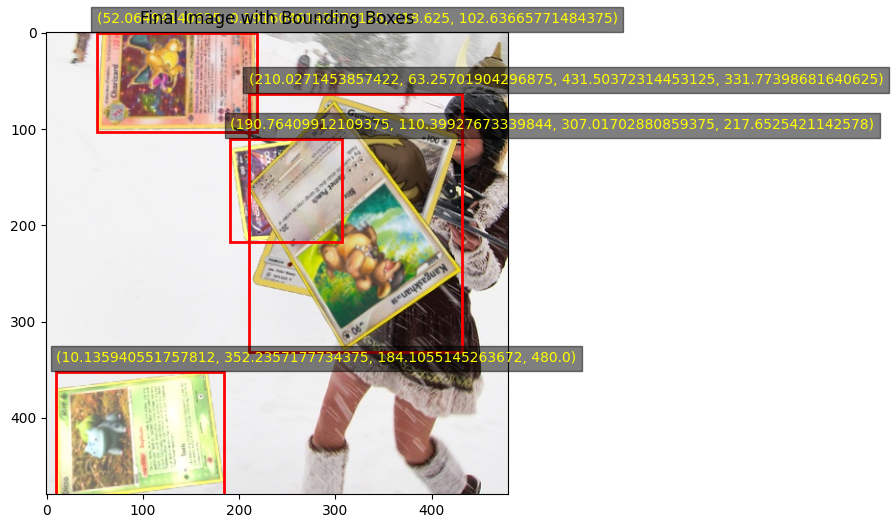

In [25]:
import cv2
import matplotlib.pyplot as plt
import matplotlib.patches as patches
# bg_folder = "backgrounds"
# cards_path = "pokemon_cards"
# final_img, bboxes = create_image_with_random_cards(bg_folder, cards_path)
final_img = results[0].orig_img
# Display the final image using OpenCV's imshow
cv2.imshow('Final Image with Cards', final_img)
cv2.waitKey(0)  # Wait for a key press
cv2.destroyAllWindows()  # Close the window when done

bboxes = results[0].boxes.xyxy.cpu().numpy()


final_img_rgb = cv2.cvtColor(final_img, cv2.COLOR_BGR2RGB)
# Plot the image
plt.figure(figsize=(8, 6))
plt.imshow(final_img_rgb)
plt.axis('on')
print(bboxes)
# Plot and annotate the bounding boxes
for bbox in bboxes:
    print(bbox)
    x_min, y_min, x_max, y_max = bbox
    # Create a rectangle patch for the bounding box
    rect = patches.Rectangle(
        (x_min, y_min),  # Bottom-left corner
        x_max - x_min,  # Width
        y_max - y_min,  # Height
        linewidth=2,
        edgecolor='red',
        facecolor='none'
    )
    plt.gca().add_patch(rect)
    # Annotate the bounding box
    plt.text(
        x_min, y_min - 10, f'({x_min}, {y_min}, {x_max}, {y_max})',
        color='yellow',
        fontsize=10,
        bbox=dict(facecolor='black', alpha=0.5)
    )

# Display the result
plt.title("Final Image with Bounding Boxes")
plt.show()

In [6]:
def center_crop(frame, target_size=(480, 480)):
    h, w, _ = frame.shape
    crop_h, crop_w = target_size

    # Calculate cropping coordinates
    start_x = max(0, (w - crop_w) // 2)
    start_y = max(0, (h - crop_h) // 2)
    end_x = start_x + crop_w
    end_y = start_y + crop_h

    # Perform cropping
    cropped_frame = frame[start_y:end_y, start_x:end_x]
    return cropped_frame

In [7]:
import cv2

# Initialize the webcam (use 0 for default webcam, or 1, 2, etc., for external webcams)
cap = cv2.VideoCapture(0)

# model = YOLO("runs/detect/train5/weights/best.pt")

# Check if the webcam is opened correctly
if not cap.isOpened():
    print("Error: Could not open webcam.")
    exit()

# Loop to capture frames
while True:
    # Capture frame-by-frame
    ret, frame = cap.read()
    
    # If frame is read correctly, ret will be True
    if not ret:
        print("Error: Cannot read frame.")
        break

    # results = model.predict(frame, imgsz=480)
    print(frame.shape)
    cropped_frame = center_crop(frame, target_size=(480, 480))
    # Display the resulting frame
    cv2.imshow('Webcam', cropped_frame)

    # Break the loop on 'q' key press
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# Release the webcam and close windows
cap.release()
cv2.destroyAllWindows()


(480, 640, 3)
(480, 640, 3)
(480, 640, 3)
(480, 640, 3)
(480, 640, 3)
(480, 640, 3)
(480, 640, 3)
(480, 640, 3)
(480, 640, 3)
(480, 640, 3)
(480, 640, 3)
(480, 640, 3)
(480, 640, 3)
(480, 640, 3)
(480, 640, 3)
(480, 640, 3)
(480, 640, 3)
(480, 640, 3)
(480, 640, 3)
(480, 640, 3)
(480, 640, 3)
(480, 640, 3)
(480, 640, 3)
(480, 640, 3)
(480, 640, 3)
(480, 640, 3)
(480, 640, 3)
(480, 640, 3)
(480, 640, 3)
(480, 640, 3)
(480, 640, 3)
(480, 640, 3)
(480, 640, 3)
(480, 640, 3)
(480, 640, 3)
(480, 640, 3)
(480, 640, 3)
(480, 640, 3)
(480, 640, 3)
(480, 640, 3)
(480, 640, 3)
(480, 640, 3)
(480, 640, 3)
(480, 640, 3)
(480, 640, 3)
(480, 640, 3)
(480, 640, 3)
(480, 640, 3)
(480, 640, 3)
(480, 640, 3)
(480, 640, 3)
(480, 640, 3)
(480, 640, 3)
(480, 640, 3)
(480, 640, 3)
(480, 640, 3)
(480, 640, 3)
(480, 640, 3)
(480, 640, 3)
(480, 640, 3)
(480, 640, 3)
(480, 640, 3)
(480, 640, 3)
(480, 640, 3)
(480, 640, 3)
(480, 640, 3)
(480, 640, 3)
(480, 640, 3)
(480, 640, 3)
(480, 640, 3)
(480, 640, 3)
(480, 